In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)

In [2]:
df = pd.read_csv(os.path.join("NN_dataset.csv"))
df.set_index('Customer_ID', inplace=True)
df.head()

,Num_CC,Dependents,Status_Checking_Acc,Credit_History,Purposre_Credit_Taken,Savings_Acc,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Other_Inst_Plans,Housing,Job,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned,Default_On_Payment
Customer_ID,,,,,,,,,,,,,,,,,,
100001,2,1,A11,A34,A43,A65,A75,A93,A101,A143,A152,A173,A192,A201,B10,B20,B35,0
100002,1,1,A12,A32,A43,A61,A73,A92,A101,A143,A152,A173,A191,A201,B14,B22,B30,0
100003,1,2,A14,A34,A46,A61,A74,A93,A101,A143,A152,A172,A191,A201,B11,B20,B33,0
100004,1,2,A11,A32,A42,A61,A74,A93,A103,A143,A153,A173,A191,A201,B13,B23,B33,0
100005,2,2,A11,A33,A40,A61,A73,A93,A101,A143,A153,A173,A191,A201,B12,B21,B33,1


In [3]:
df = df.drop(columns=['Num_CC', 'Dependents', 'Status_Checking_Acc', 'Credit_History', 'Savings_Acc', 'Marital_Status_Gender', 'Other_Inst_Plans ', 'Job'])
df.columns

Index(['Purposre_Credit_Taken', 'Years_At_Present_Employment',
       'Other_Debtors_Guarantors', 'Housing', 'Telephone', 'Foreign_Worker',
       'Duration_binned', 'Credit_amount_binned', 'Age_binned',
       'Default_On_Payment'],
      dtype='object')

In [4]:
target = df["Default_On_Payment"]
target_names = ["No Default", "Defaulted"]

In [5]:
data = df.drop("Default_On_Payment", axis=1)
feature_names = data.columns
data.head()

,Purposre_Credit_Taken,Years_At_Present_Employment,Other_Debtors_Guarantors,Housing,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned
Customer_ID,,,,,,,,,
100001,A43,A75,A101,A152,A192,A201,B10,B20,B35
100002,A43,A73,A101,A152,A191,A201,B14,B22,B30
100003,A46,A74,A101,A152,A191,A201,B11,B20,B33
100004,A42,A74,A103,A153,A191,A201,B13,B23,B33
100005,A40,A73,A101,A153,A191,A201,B12,B21,B33


In [6]:
from sklearn.preprocessing import LabelEncoder

columnsToEncode = list(data)
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        data[feature] = le.fit_transform(data[feature])
    except:
        print('Error encoding '+feature)
data.head()

,Purposre_Credit_Taken,Years_At_Present_Employment,Other_Debtors_Guarantors,Housing,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned
Customer_ID,,,,,,,,,
100001,4,4,0,1,1,0,0,0,5
100002,4,2,0,1,0,0,4,2,0
100003,7,3,0,1,0,0,1,0,3
100004,3,3,2,2,0,0,3,3,3
100005,0,2,0,2,0,0,2,1,3


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
from sklearn.model_selection import GridSearchCV
powers = range(0,5)
cs = [10**i for i in powers]
param_grid = dict(C=cs)
grid = GridSearchCV(model, param_grid, verbose=4)

In [10]:
grid.fit(X_train, y_train)

C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.763, total=   0.3s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................. C=1, score=0.772, total=   0.3s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................. C=1, score=0.776, total=   0.3s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................ C=10, score=0.837, total=   0.3s
[CV] C=10 ............................................................


C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................ C=10, score=0.841, total=   0.4s
[CV] C=10 ............................................................


C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................ C=10, score=0.818, total=   0.4s
[CV] C=100 ...........................................................


C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=100, score=0.896, total=   0.7s
[CV] C=100 ...........................................................


C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=100, score=0.895, total=   0.7s
[CV] C=100 ...........................................................


C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=100, score=0.883, total=   0.9s
[CV] C=1000 ..........................................................


C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .............................. C=1000, score=0.913, total=   1.4s
[CV] C=1000 ..........................................................


C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .............................. C=1000, score=0.904, total=   1.4s
[CV] C=1000 ..........................................................


C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .............................. C=1000, score=0.913, total=   1.5s
[CV] C=10000 .........................................................


C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................. C=10000, score=0.910, total=   1.7s
[CV] C=10000 .........................................................


C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................. C=10000, score=0.912, total=   1.8s
[CV] C=10000 .........................................................


C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................. C=10000, score=0.913, total=   1.8s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   13.9s finished
C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [11]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10000}
0.9114666666666666


In [36]:
model = SVC(kernel='rbf', C = grid.best_estimator_.C)
model.fit(X_train, y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.942


In [38]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
predictprob = model.decision_function(X_test)
print(classification_report (y_test, predictions, target_names=target_names))


              precision    recall  f1-score   support

  No Default       0.94      0.98      0.96       862
   Defaulted       0.96      0.85      0.90       388

    accuracy                           0.94      1250
   macro avg       0.95      0.92      0.93      1250
weighted avg       0.94      0.94      0.94      1250



In [39]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")
    plt.show()

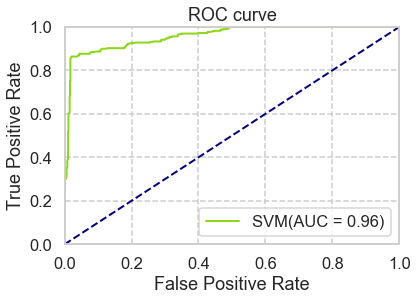

In [40]:
plotAUC(y_test,predictprob, 'SVM')

In [112]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["No Default", "Defaulted"]
    
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylim(-0.5,1.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

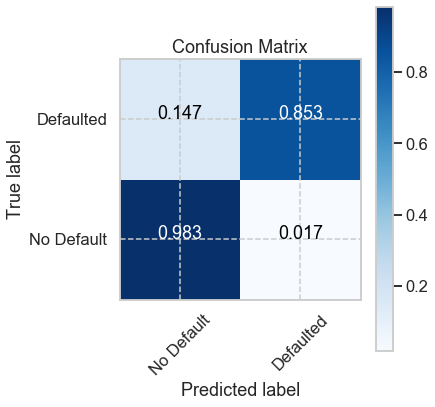

In [113]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=True)